In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#read the file
df = pd.read_csv('2010.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define the id_vars for the melt function
id_vars = ['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category', 'date']

# Melt the DataFrame to have a single datetime column
df_melted = df.melt(id_vars=id_vars, var_name='time', value_name='consumption')



# Combine the 'date' and 'time' columns into a single 'datetime' column
df_melted['datetime'] = pd.to_datetime(df_melted['date'].dt.date.astype(str) + ' ' + df_melted['time'])


# Drop the separate 'date' and 'time' columns
df_melted.drop(['date', 'time'], axis=1, inplace=True)

# Set 'datetime' as the index
df_melted.set_index('datetime', inplace=True)

# Sort the DataFrame by 'datetime'
df_melted.sort_values('datetime', inplace=True)

C:\Users\Stijn\AppData\Local\Temp\ipykernel_509444\3211555485.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [3]:
df_melted.head()

,Customer,Generator Capacity,Postcode,Consumption Category,consumption
datetime,,,,,
2010-07-01,201,1.75,2291,GG,0.000
2010-07-01,36,1.00,2137,GG,0.000
2010-07-01,36,1.00,2137,CL,2.209
2010-07-01,36,1.00,2137,GC,0.191
2010-07-01,35,2.10,2284,GG,0.000


KeyboardInterrupt: 

In [ ]:
gg_data = df_melted[df_melted['Consumption Category'] == 'GG']

gg_data.head()

,Customer,Generator Capacity,Postcode,Consumption Category,consumption
datetime,,,,,
2010-07-01,201,1.75,2291,GG,0.0
2010-07-01,36,1.00,2137,GG,0.0
2010-07-01,35,2.10,2284,GG,0.0
2010-07-01,34,1.00,2082,GG,0.0
2010-07-01,33,2.10,2303,GG,0.0


In [ ]:
grouped = gg_data.groupby(['Customer', 'datetime'])
grouped.head()

,Customer,Generator Capacity,Postcode,Consumption Category,consumption
datetime,,,,,
2010-07-01 00:00:00,201,1.75,2291,GG,0.000
2010-07-01 00:00:00,36,1.00,2137,GG,0.000
2010-07-01 00:00:00,35,2.10,2284,GG,0.000
2010-07-01 00:00:00,34,1.00,2082,GG,0.000
2010-07-01 00:00:00,33,2.10,2303,GG,0.000
...,...,...,...,...,...
2011-06-30 23:30:00,98,1.00,2204,GG,0.000
2011-06-30 23:30:00,99,1.00,2048,GG,0.000
2011-06-30 23:30:00,100,1.50,2100,GG,0.006


In [ ]:
# Group the data by 'Customer'
# Define the start and end of the week
start_date = '2010-07-01'
end_date = '2010-07-07'

# Group the data by 'Customer'
grouped = gg_data.groupby('Customer')
number = 0
# Loop over each group and create a separate plot for each group
for name, group in grouped:
    # Limit the data to the specified week
    week_data = group.loc[start_date:end_date]
    
    # Plot the data
    week_data['consumption'].plot(kind='line')

    # Set the title and labels
    plt.title('Consumption Over Time for Customer ' + str(name) + ' (GG Category)')
    plt.xlabel('Datetime')
    plt.ylabel('Consumption')
    number += 1
    # Show the plot
    plt.show()
    if number == 5:
        break  

NameError: name 'gg_data' is not defined

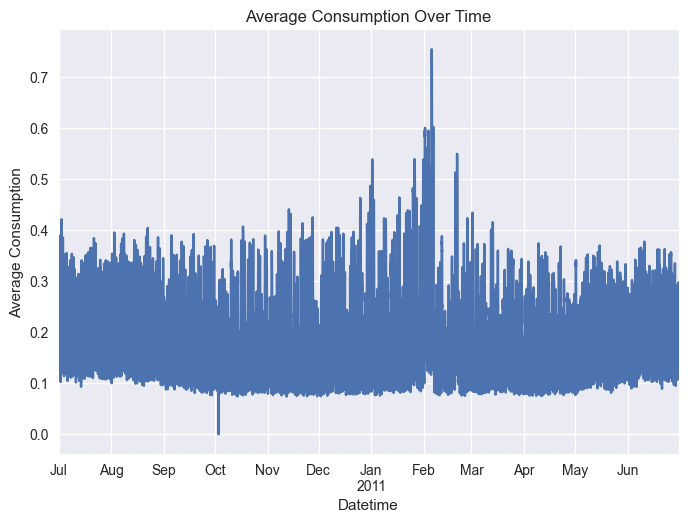

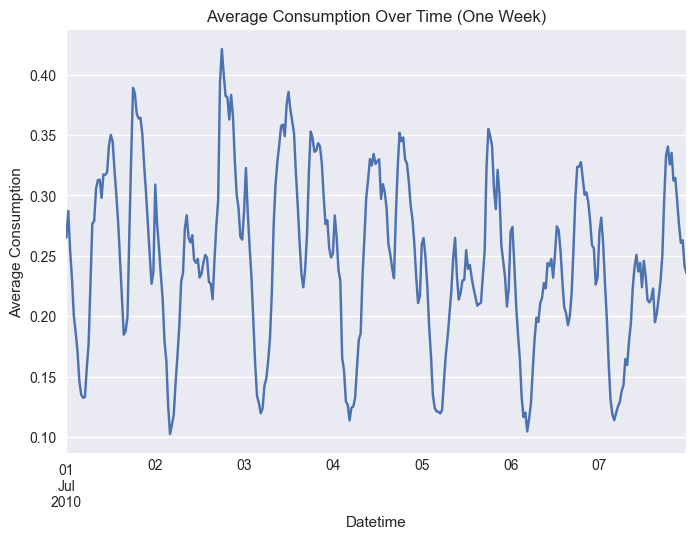

In [ ]:
# Group the data by 'datetime' and calculate the mean of 'consumption' for each group
groupedd = df_melted.groupby('datetime')['consumption'].mean()

# Plot the data
groupedd.plot(kind='line')

# Set the title and labels
plt.title('Average Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Average Consumption')

# Show the plot
plt.show()
# Define the start and end of the week
start_date = '2010-07-01'
end_date = '2010-07-07'

# Limit the data to the specified week
week_data = groupedd.loc[start_date:end_date]

# Plot the data
week_data.plot(kind='line')

# Set the title and labels
plt.title('Average Consumption Over Time (One Week)')
plt.xlabel('Datetime')
plt.ylabel('Average Consumption')

# Show the plot
plt.show()